<a href="https://colab.research.google.com/github/MarjorieChdtn/WSC/blob/main/Business_case_Churn_dans_les_t%C3%A9l%C3%A9coms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objectifs:**
* Effectuer une analyse basée sur des données
* Présenter des visualisations pertinentes
* Proposer des conseils pour aider à la décision

1. Calculer le taux d'attrition (nombre de résiliations / nombre total de clients).
2. Effectuer l'analyse demandée, avec des visualisations explicatives, et propose un scoring par client.
3. Proposer des recommandations pour réduire la résiliation.

In [ ]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/murpi/wilddata/master/quests/churn_telecom.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**CALCUL DU TAUX D'ATTRITION**

In [ ]:
# Calcul du taux d'attrition

somme_churn_yes = (df['Churn'] == 'Yes').sum()
total_client = len(df['Churn'])
taux_attrition = somme_churn_yes / total_client * 100
round(taux_attrition,2)

31.51

**ANALYSE PRELIMINAIRE DE LA BASE DE DONNEES**

In [ ]:
# Graphique 1

df_yes = df[df['Churn'] == 'Yes']
cross_table_yes = pd.crosstab(df_yes['tenure'], df_yes['Churn'])
cross_table_yes.columns = ['Nombre de clients']
cross_table_yes = cross_table_yes.reset_index()

fig1 = px.bar(cross_table_yes, x='tenure', y='Nombre de clients',
             title='Diagramme de résiliation en fonction de la durée',
             labels={'Nombre de clients': 'Nombre de clients'},)

# Graphique 2

cross_table = pd.crosstab(df['gender'], df['Churn']) #tableau croisé pour comptage occurences churn et gender
cross_table.columns = ['No', 'Yes'] #renommage des colonnes
cross_table = cross_table.reset_index() #réinitialisation de l'index pour avoir 'gender' en colonne
cross_table_long = pd.melt(cross_table, id_vars=['gender'], value_vars=['Yes', 'No'],
                           var_name='Churn', value_name='Nombre de clients') #reformatage pour avoir une seule colonne 'churn'

fig2 = px.bar(cross_table_long, x='gender', y='Nombre de clients', color='Churn',
             title='Diagramme de résiliation par genre',
             labels={'Nombre de clients': 'Nombre de clients', 'Churn': 'Churn'},
             color_discrete_map={'No': 'green', 'Yes': 'red'})

# Graphique 3

df_yes = df[df['Churn'] == 'Yes']
cross_table_yes = pd.crosstab(df_yes['InternetService'], df_yes['Churn'])
cross_table_yes.columns = ['Nombre de clients']
cross_table_yes = cross_table_yes.reset_index()

fig3 = px.bar(cross_table_yes, x='InternetService', y='Nombre de clients',
             title= 'Les services les plus résiliés',
             labels={'Nombre de clients': 'Nombre de clients'},
             height=400, width=600)

# Graphique 4

fig4 = px.box(df, x="Churn", y= "MonthlyCharges")

fig = make_subplots(rows=2, cols=2, subplot_titles=['Nombre de résiliations en fonction de la durée', 'Nombre de résiliations par genre', 'Les services les plus résiliés', 'Comparatif des tarifs mensuels entre abonnements résiliés et non résiliés'])

# Config de l'affichage des graphiques

fig.add_trace(fig1['data'][0], row=1, col=1)
fig.add_trace(fig2['data'][0], row=1, col=2)
fig.add_trace(fig3['data'][0], row=2, col=1)
fig.add_trace(fig4['data'][0], row=2, col=2)

fig.update_xaxes(title_text="Durée du contrat (en mois)", row=1, col=1)
fig.update_xaxes(title_text="Genre", row=1, col=2)

fig.update_yaxes(title_text="Nombre de clients", row=1, col=1)
fig.update_yaxes(title_text="Nombre de clients", row=1, col=2)
fig.update_yaxes(title_text="Nombre de clients", row=2, col=1)
fig.update_yaxes(title_text="Tarifs mensuels", row=2, col=2)

fig.update_layout(showlegend=False)

fig.show()

* 1ere observation : le risque de résiliation est le plus important le 2e mois et reste élevé jusqu'au 6e mois du contrat.
* 2e observation : le service DSL est particulièrement concerné par les résiliations et dans une moindre mesure les forfaits téléphoniques.
* 3e observation : les tarifs ont un impact sur la résiliation. Par exemple : le tarif pour lequel 25 % des abonnements sont inférieurs ou égaux est 49.4 $$ pour les abonnements résiliés et 25.3 $ pour les non résiliés.
* 4e observation : aucun impact du genre du client sur son comportement d'achat.

**PREPARATION DU DATAFRAME POUR MACHINE LEARNING**

In [ ]:
# ETAPE 1 : Traitement des valeurs pour faciliter la factorisation
# No phone service + No Internet service => transformer en No

df['MultipleLines'] = df['MultipleLines'].replace({"No phone service": "No"})

colonnes_a_simplifier = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[colonnes_a_simplifier] = df[colonnes_a_simplifier].replace({"No internet service": "No"})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,Yes
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,Fiber optic,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
# ETAPE 2 : Factorisation des colonnes qui contiennent 2 données différentes.

colonnes_a_factoriser = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling' ,'Churn', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
df[colonnes_a_factoriser] = df[colonnes_a_factoriser].apply(lambda x: x.map({'Yes': 1, 'No': 0}))

df['gender'] = df['gender'].map({'Female': 1, 'Male': 0})
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,1,0,1,0,1,0,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,1
1,5575-GNVDE,0,0,0,0,34,1,0,Fiber optic,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,0,0,0,0,2,1,0,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,0,0,0,0,45,0,0,Fiber optic,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,1,0,0,0,2,1,0,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,DSL,1,...,1,1,1,1,One year,1,Mailed check,84.80,1990.5,0
7039,2234-XADUH,1,0,1,1,72,1,1,Fiber optic,0,...,1,0,1,1,One year,1,Credit card (automatic),103.20,7362.9,0
7040,4801-JZAZL,1,0,1,1,11,0,0,Fiber optic,1,...,0,0,0,0,Month-to-month,1,Electronic check,29.60,346.45,0
7041,8361-LTMKD,0,1,1,0,4,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Mailed check,74.40,306.6,1


In [ ]:
# ETAPE 3 : Traitement des colonnes 'InternetService', 'Contract', 'PaymentMethod'

colonnes_a_dummyfier = ['InternetService', 'Contract', 'PaymentMethod']

df = pd.get_dummies(df, columns=colonnes_a_dummyfier)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 28 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   gender                                   7043 non-null   int64  
 2   SeniorCitizen                            7043 non-null   int64  
 3   Partner                                  7043 non-null   int64  
 4   Dependents                               7043 non-null   int64  
 5   tenure                                   7043 non-null   int64  
 6   PhoneService                             7043 non-null   int64  
 7   MultipleLines                            7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

In [ ]:
# ETAPE 4 : Conversion des bools en int
colonnes_uint8 = df.select_dtypes(include='uint8').columns
df[colonnes_uint8] = df[colonnes_uint8].astype(int)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,0,...,1,0,0,0,1,0,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [ ]:
df['TotalCharges']= pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
correlation_churn = df.corr()['Churn'].drop('Churn')  # exclusion 'churn'
correlation_matrix = pd.DataFrame(correlation_churn)

fig = px.imshow(correlation_matrix.T,  # Transposer pour avoir les colonnes en x
                labels=dict(color="Corrélation"),
                x=correlation_matrix.index,
                y=['Churn'],
                color_continuous_scale="Viridis",
                title='Heatmap de Corrélation avec Churn')

fig.show()

<ipython-input-12-973c427e562f>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



**Observations :**
On observe une forte corrélation positive entre les désabonnements et la souscription au service DSL, ainsi qu'avec une souscription Mois-Par-Mois. Dans une moindre mesure, le moyen de paiement (Electronic Check) est également corrélé.
On observe une forte corrélation négative entre la durée du contrat et le désabonnement. En d'autres termes, plus la durée du contrat augmente, plus le risque de désabonnement diminue.

In [ ]:
df.isna().sum()

customerID                                  0
gender                                      0
SeniorCitizen                               0
Partner                                     0
Dependents                                  0
tenure                                      0
PhoneService                                0
MultipleLines                               0
OnlineSecurity                              0
OnlineBackup                                0
DeviceProtection                            0
TechSupport                                 0
StreamingTV                                 0
StreamingMovies                             0
PaperlessBilling                            0
MonthlyCharges                              0
TotalCharges                               11
Churn                                       0
InternetService_DSL                         0
InternetService_Fiber optic                 0
InternetService_No                          0
Contract_Month-to-month           

In [ ]:
df['TotalCharges'].fillna(df['tenure'] * df['MonthlyCharges'], inplace=True)

**ANALYE DES CARACTERISIQUES RESILIES / NON RESILIES**

**ETAPE 1 : standardisation et clusterisation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

X = df.select_dtypes(include='number').drop(columns=['Churn'])
y = df['Churn']

# Standardisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Réduction dimension avec PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scatterplot
df['PCA1'] = X_pca[:, 0]
df['PCA2'] = X_pca[:, 1]

fig = px.scatter(df, x='PCA1', y='PCA2', color='Churn',
                 labels={'PCA1': 'Principal Component 1', 'PCA2': 'Principal Component 2'})
fig.show()

Il n'y a pas de distinction nette entre le cluster des résiliés et celui des non-résiliés. De plus, les points sont disparates au sein d'un même cluster, ce qui sous-entend qu'il n'y a pas forcément de caractéristiques similaires entre individus d'un même cluster.

En résumé : les données sont plus complexes qu'il n'y paraît. L'algorithme a probablement identifié d'autres sous-groupes ou tendances.

Représentation des variables - aide à la visualisation

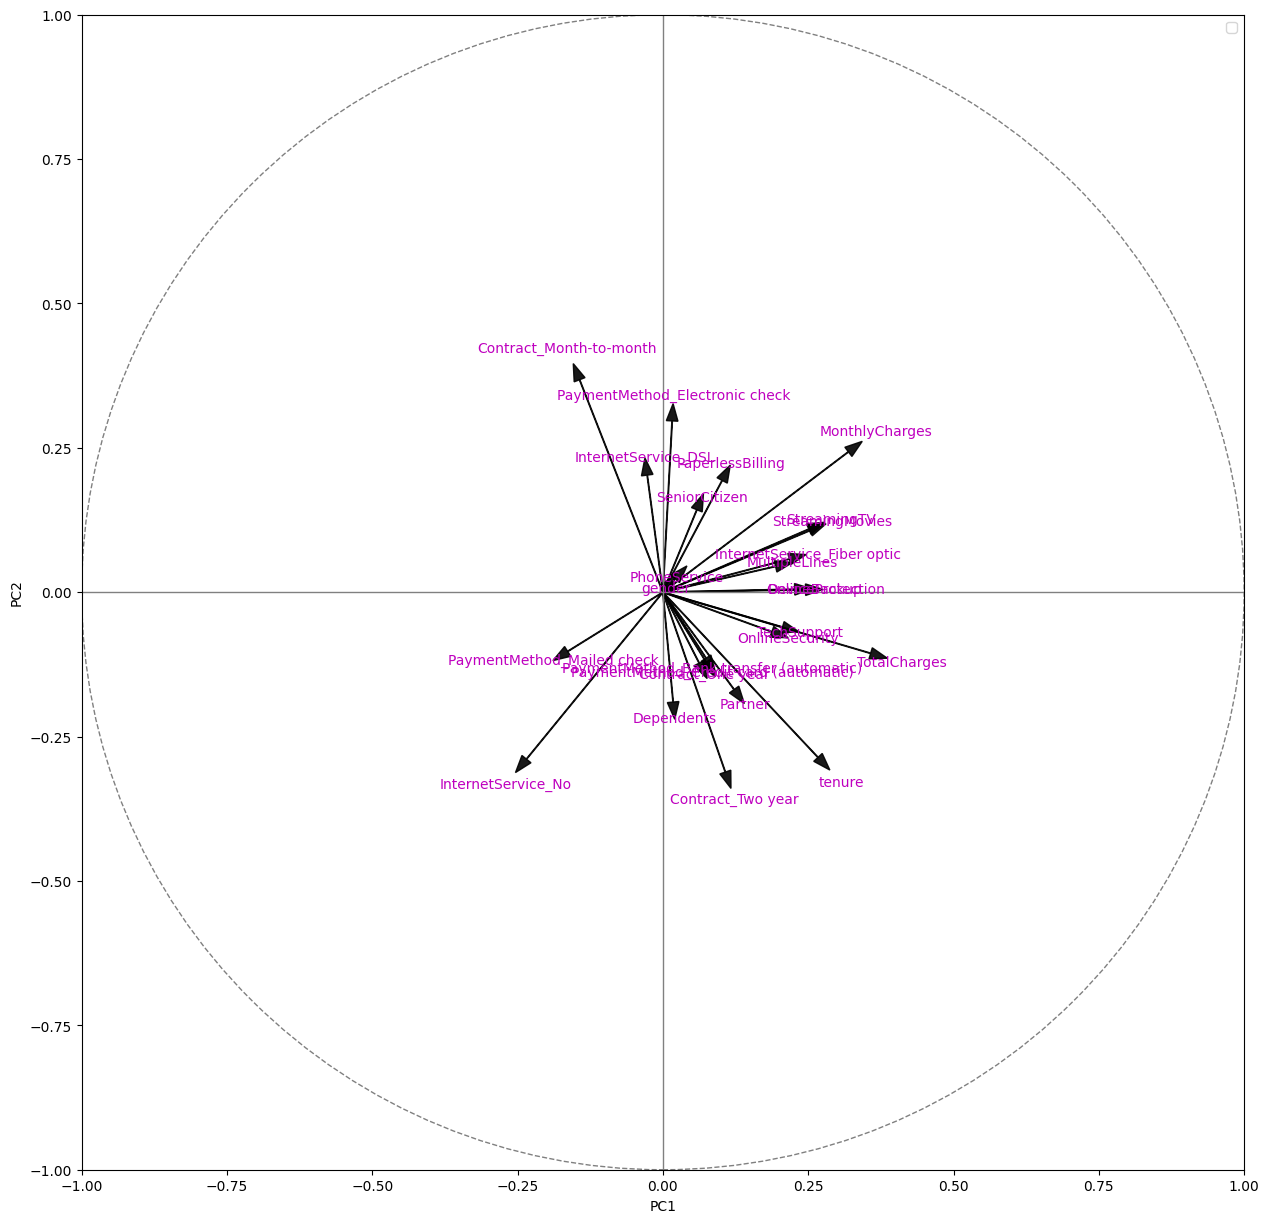

In [ ]:
# préparation de 2 vecteurs (xs et ys) = directions de base de PCA1 et PCA2

coeff = np.transpose(pca.components_[0:2, :])
n = coeff.shape[0]
xs = np.array([1,0])
ys = np.array([0,1])

# graph
plt.figure(figsize=(15,15))

feature_names = X.columns
col_exclusion = ['PCA1', 'PCA2', 'Churn']

# espace entre les flèches
extension_factor = 1.15

for i in range(n):
  if feature_names[i] not in col_exclusion:
    plt.arrow(0, 0, coeff[i, 0], coeff[i, 1], color = 'k', alpha =0.9, head_width=0.02)
    plt.text(coeff[i, 0] *extension_factor, coeff[i, 1] *extension_factor, feature_names[i], color ='m', ha = 'center', va = 'center')

# cercle unitaire
circle = plt.Circle((0,0),1, color = 'gray', fill=False, linestyle='--')
plt.gca().add_artist(circle)

plt.xlim(-1,1)
plt.ylim(-1,1)
plt.axhline(0, color = 'gray', linewidth=1)
plt.axvline(0, color = 'gray', linewidth=1)
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.legend(loc='best', scatterpoints=1)

plt.show()

On constate que l'APC a mis en abscisse le type de prestations et en ordonnées la durée du contrat. Ainsi ce sont les clients ayant souscrits au Mois-par-Mois qui sont sur y>0 et les contrats de 2 ans sur y<0.

L'analyse des composantes principales confirment les premières observations : les désabonnés se concentrent davantage dans la zone des contrats au mois / service DSL / paiement Electronic Check. Il y aurait également une corrélation avec MonthlyCharges

On observe que ce qui peut influencer favorablement 'tenure' = Partner, paiements automatisés par CB et Virement bancaire, MonthlyCharges (cqfd le prix), InternetService_No

La principale question qui découle de cette analyse :
* le contrat mois-par-mois / DSL n'est-il pas trop cher par rapport à la concurrence?

**ETAPE 2 : choix du meilleur algo de classification**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.select_dtypes(include='number').drop(columns=['Churn', 'Cluster',	'PCA1',	'PCA2'])
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 55)

In [ ]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import plot_tree, DecisionTreeClassifier

from sklearn.metrics import accuracy_score, r2_score

In [ ]:
# KNN

# GridSearch
param_grid_KNN = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'metric': ['euclidean', 'manhattan']
}

modelKNN = KNeighborsClassifier()
modelKNN.fit(X_train, y_train)

# Recherche d'hyperparamètres
grid_search_KNN = GridSearchCV(modelKNN, param_grid_KNN, cv=5, scoring='accuracy')
grid_search_KNN.fit(X_train, y_train)

print("Meilleurs paramètres pour KNN :")
print(grid_search_KNN.best_params_)
print(grid_search_KNN.best_score_)

Meilleurs paramètres pour KNN :
{'algorithm': 'kd_tree', 'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
0.7934495140620969


In [ ]:
# Logistic regression

param_grid_LR = {
    'penalty': ['l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'fit_intercept': [True, False],
    'solver': ['lbfgs'],
    'max_iter': [7100],
    'multi_class': ['auto', 'ovr', 'multinomial'],
    'class_weight': [None, 'balanced']
}

modelLR = LogisticRegression()
modelLR.fit(X_train, y_train)

grid_search_LR= GridSearchCV(modelLR, param_grid_LR, cv=5, scoring='accuracy')
grid_search_LR.fit(X_train, y_train)

print("Meilleurs paramètres pour LR :")
print(grid_search_LR.best_params_)
print(grid_search_LR.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Meilleurs paramètres pour LR :
{'C': 10, 'class_weight': None, 'fit_intercept': False, 'max_iter': 7100, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
0.8754232246781916


In [ ]:
# Decision Tree

param_grid_DTC = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
    'class_weight': [None, 'balanced'],
    'random_state': [42],
}

modelDTC = DecisionTreeClassifier()
modelDTC.fit(X_train, y_train)

grid_search_DTC= GridSearchCV(modelDTC, param_grid_DTC, cv=5, scoring='accuracy')
grid_search_DTC.fit(X_train, y_train)

print("Meilleurs paramètres pour DTC :")
print(grid_search_DTC.best_params_)
print(grid_search_DTC.best_score_)

Meilleurs paramètres pour DTC :
{'class_weight': None, 'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'best'}
0.8767495197958773


In [ ]:
# Meilleur modèle entraîné avec les meilleurs paramètres
best_modelKNN = grid_search_KNN.best_estimator_
best_modelLR = grid_search_LR.best_estimator_
best_modelDTC = grid_search_DTC.best_estimator_

# Accuracy scores
accuracyKNN_train = accuracy_score(y_train, best_modelKNN.predict(X_train))
accuracyLR_train = accuracy_score(y_train, best_modelLR.predict(X_train))
accuracyDTC_train = accuracy_score(y_train, best_modelDTC.predict(X_train))

accuracyKNN_test = accuracy_score(y_test, best_modelKNN.predict(X_test))
accuracyLR_test = accuracy_score(y_test, best_modelLR.predict(X_test))
accuracyDTC_test = accuracy_score(y_test,  best_modelDTC.predict(X_test))

print("Accuracy KNN - Train:", accuracyKNN_train)
print("Accuracy KNN - Test:", accuracyKNN_test)

print("Accuracy LR - Train:", accuracyLR_train)
print("Accuracy LR - Test:", accuracyLR_test)

print("Accuracy DTC - Train:", accuracyDTC_train)
print("Accuracy DTC - Test:", accuracyDTC_test)

Accuracy KNN - Train: 0.8349110185535782
Accuracy KNN - Test: 0.8131743327654741
Accuracy LR - Train: 0.87731919727376
Accuracy LR - Test: 0.8739352640545145
Accuracy DTC - Train: 0.8875425975009467
Accuracy DTC - Test: 0.8745031232254401


In [ ]:
from sklearn.metrics import confusion_matrix

best_modelLR = LogisticRegression(C=100, class_weight= None, fit_intercept=False, max_iter=7100, multi_class='multinomial', penalty='l2', solver='lbfgs')

best_modelLR.fit(X_test, y_test)

class_labels = [str(cls) for cls in best_modelLR.classes_]

conf_matrix = confusion_matrix(y_true=y_test, y_pred=best_modelLR.predict(X_test))
confusion_df = pd.DataFrame(data=conf_matrix,
                             index=[f'{cls} actual' for cls in class_labels],
                             columns=[f'{cls} predicted' for cls in class_labels])
confusion_df

,0 predicted,1 predicted
0 actual,1100,88
1 actual,130,443


Avec un algorithme de Régression Logistique, on obtient des prédictions satisfaisantes :
* 1 545 prédictions ont été classées correctement
* 216 mauvaises prédictions soit 12 % (90 prédictions ont été classées en "résiliée" alors que ce sont des "non résiliées" et 126 prédictions ont été classées en "non résiliée" alors qu'initialement elles sont "résiliées")

**ETAPE 3 : Identifier les principales variables d'influence sur la résiliation**

In [ ]:
coefficients = best_modelLR.coef_

coefficients_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': coefficients[0]})

coefficients_df['Absolute_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df_sorted = coefficients_df.sort_values(by='Absolute_Coefficient', ascending=False)
coefficients_df_sorted.head(30)

,Variable,Coefficient,Absolute_Coefficient
17,InternetService_Fiber optic,-1.253556,1.253556
5,PhoneService,-0.937169,0.937169
16,InternetService_DSL,0.664100,0.664100
10,TechSupport,-0.417382,0.417382
11,StreamingTV,-0.413739,0.413739
7,OnlineSecurity,-0.375528,0.375528
3,Dependents,-0.336170,0.336170
18,InternetService_No,0.294463,0.294463
20,Contract_One year,-0.287527,0.287527
9,DeviceProtection,-0.280791,0.280791


**En conclusion :** les clients les plus susceptibles de résilier sont ceux qui ont souscrits au forfait DSL ou qui n'ont pas d'abonnement Internet et/ou qui ont un abonnement Month-to-Month.

A l'inverse, les clients les moins susceptibles de résilier sont ceux bénéficiant de la fibre optique et ou d'un service téléphonique, ainsi que de services complémentaires (type TechSupport ou StreamingTV).

**ETAPE 4 : calcul de la probabilité pour chaque client qu'il soit résilié**

In [ ]:
proba_predictions = best_modelLR.predict_proba(X)

df['Proba_Churn'] = proba_predictions[:, 1]
df_churn = df[['customerID', 'tenure', 'InternetService_DSL', 'Contract_Month-to-month', 'Churn', 'Proba_Churn']]
df_churn

,customerID,tenure,InternetService_DSL,Contract_Month-to-month,Churn,Proba_Churn
0,7590-VHVEG,1,0,1,1,0.406863
1,5575-GNVDE,34,0,0,0,0.007484
2,3668-QPYBK,2,1,1,1,0.914817
3,7795-CFOCW,45,0,0,0,0.001098
4,9237-HQITU,2,1,1,1,0.991061
...,...,...,...,...,...,...
7038,6840-RESVB,24,1,0,0,0.313594
7039,2234-XADUH,72,0,0,0,0.023257
7040,4801-JZAZL,11,0,1,0,0.090310
7041,8361-LTMKD,4,0,1,1,0.638945


**ETAPE 5 : Déterminer les clients à risque à appeler en priorité**

In [ ]:
df_churn = df_churn[df_churn['Churn'] == 0] # récupérer les individus qui n'ont pas encore résiliés
df_prio = df_churn.sort_values(by='Proba_Churn', ascending=False) #classement par ordre décroissant des proba de résiliation
df_prio

,customerID,tenure,InternetService_DSL,Contract_Month-to-month,Churn,Proba_Churn
211,4195-NZGTA,1,1,1,0,0.968560
6739,6994-KERXL,4,1,1,0,0.957611
6055,6599-SFQVE,6,1,1,0,0.952607
594,9244-ZVAPM,1,1,1,0,0.950746
2171,3995-WFCSM,2,1,1,0,0.950053
...,...,...,...,...,...,...
3160,2253-KPMNB,69,0,0,0,0.000094
109,2848-YXSMW,72,0,0,0,0.000086
2338,4277-BWBML,72,0,0,0,0.000086
5212,3511-BFTJW,72,0,0,0,0.000057


Recommandations stratégiques finales pour réduire le taux de churn :
* concentrer les efforts de fidélisation sur les nouveaux clients (< 6 mois) qui ont souscrit un abonnement mensuel DSL.
* vérifier le positionnement de l'offre DSL par rapport aux concurrents
* analyser les retours clients au SAV (délais d'installation de la box, débit de connexion ...)
* récupérer la raison donnée par les clients lorsqu'ils se désabonnent
* revoir les conditions du contrat au mois (conditions de résiliation, moyen de paiement ...)